### 1. Importing Necessary Libraries & loading Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv(r'C:\Users\afree\Downloads\spotify_songs_dataset..csv')

In [5]:
df.head(5)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


### 2. Initial Data Exploration

In [8]:
# Display basic info

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB
None


In [10]:
# Check for missing values

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64


### 3. Data Cleaning

#### Handle missing values

In [14]:
# For missing values fill with mode

df['duration'].fillna(df['duration'].mode()[0], inplace=True)
df['language'].fillna('Unknown', inplace=True)
df['collaboration'].fillna('Unknown', inplace=True)

C:\Users\afree\AppData\Local\Temp\ipykernel_20028\3727552758.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(df['duration'].mode()[0], inplace=True)
C:\Users\afree\AppData\Local\Temp\ipykernel_20028\3727552758.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [16]:
print(df.isnull().sum())

song_id             0
song_title          0
artist              0
album               0
genre               0
release_date        0
duration            0
popularity          0
stream              0
language            0
explicit_content    0
label               0
composer            0
producer            0
collaboration       0
dtype: int64


#### Standardizing Formats:



In [19]:
# Convert Release_date to datetime 

if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [21]:
# Standardize Duration (assuming it's in milliseconds)

if 'duration' in df.columns:
    df['duration_min'] = df['duration'] / 60000  # Convert to minutes
    df.drop('duration', axis=1, inplace=True)  # Removing original column

In [23]:
# Create popularity tiers

df['Popularity_tier'] = pd.cut(df['stream'], 
                              bins=[0, 100000, 1000000, 10000000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Very High'])

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   song_id           50000 non-null  object        
 1   song_title        50000 non-null  object        
 2   artist            50000 non-null  object        
 3   album             50000 non-null  object        
 4   genre             50000 non-null  object        
 5   release_date      50000 non-null  datetime64[ns]
 6   popularity        50000 non-null  int64         
 7   stream            50000 non-null  int64         
 8   language          50000 non-null  object        
 9   explicit_content  50000 non-null  object        
 10  label             50000 non-null  object        
 11  composer          50000 non-null  object        
 12  producer          50000 non-null  object        
 13  collaboration     50000 non-null  object        
 14  duration_min      5000

In [27]:
df

,song_id,song_title,artist,album,genre,release_date,popularity,stream,language,explicit_content,label,composer,producer,collaboration,duration_min,Popularity_tier
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,Unknown,0.004700,Very High
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,Unknown,0.002117,High
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,Unknown,0.003950,Very High
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,Unknown,0.003567,Very High
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,Unknown,0.004550,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SP49996,Event push do body.,Shelley Robinson,Wrong cup.,Pop,1999-05-26,38,25078113,Spanish,No,Indie,Melissa Wilson,Leslie Ferguson,Daniel Cruz,0.004533,Very High
49996,SP49997,Share clearly role.,Jennifer Kennedy,That actually.,Folk,2016-08-21,62,29908581,Korean,Yes,Atlantic Records,Timothy Rice,Randall Martinez,Unknown,0.005917,Very High
49997,SP49998,Wonder type simply.,Hailey Walsh,South Democrat.,Pop,1997-02-28,38,75864558,Spanish,No,Atlantic Records,Susan Diaz,Katrina Fleming,Unknown,0.003450,Very High
49998,SP49999,Company.,Leah Coleman,Front.,Electronic,1996-07-15,10,41817978,English,No,Sony Music,Dr. Zachary Bell,Pam Schultz,Unknown,0.004433,Very High


### 4. Exploratory Data Analysis (EDA)

#### Basic Statistics

In [31]:
# Numerical columns summary
print(df.describe())

                     release_date    popularity        stream  duration_min
count                       50000  50000.000000  5.000000e+04  50000.000000
mean   2009-10-01 17:25:40.224000     50.783440  5.019183e+07      0.003990
min           1994-10-06 00:00:00      1.000000  1.899000e+03      0.000550
25%           2002-03-25 18:00:00     26.000000  2.523311e+07      0.003500
50%           2009-09-25 00:00:00     51.000000  5.042169e+07      0.003950
75%           2017-04-19 00:00:00     76.000000  7.519064e+07      0.004483
max           2024-10-05 00:00:00    100.000000  9.999913e+07      0.007217
std                           NaN     28.948749  2.893624e+07      0.000793


In [33]:
# Categorical columns summary
cat_cols = ['Genre', 'Language', 'Explicit_content', 'label', 'Collaboration']
for col in cat_cols:
    if col in df.columns:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())


label value counts:
label
Def Jam             8501
Indie               8411
Sony Music          8394
Atlantic Records    8289
Warner Music        8243
Universal Music     8162
Name: count, dtype: int64


#### Visualization


Text(0.5, 0, 'Log(Streams + 1)')

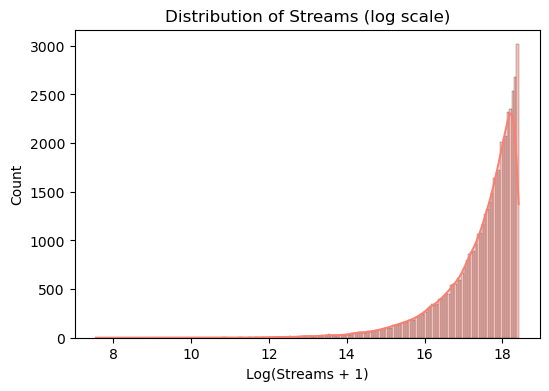

In [36]:
# 2. Distribution of streams
plt.figure(figsize=(6, 4))
sns.histplot(np.log1p(df['stream']), kde=True, color='salmon') 
plt.title('Distribution of Streams (log scale)')
plt.xlabel('Log(Streams + 1)')

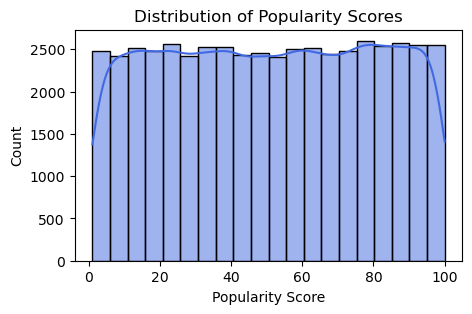

In [37]:
# 3. Popularity distribution
if 'popularity' in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df['popularity'], bins=20, kde=True, color='royalblue')
    plt.title('Distribution of Popularity Scores')
    plt.xlabel('Popularity Score')

Text(0, 0.5, '')

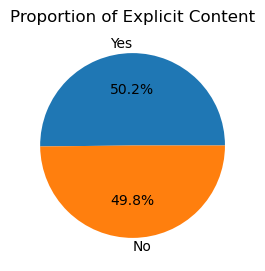

In [38]:
# 4. Explicit content proportion
plt.figure(figsize=(5, 3))
df['explicit_content'].value_counts().plot(kind='pie', autopct='%3.1f%%')
plt.title('Proportion of Explicit Content')
plt.ylabel('')

C:\Users\afree\AppData\Local\Temp\ipykernel_20028\1769002844.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='tab10')


Text(0.5, 0, 'Number of Songs')

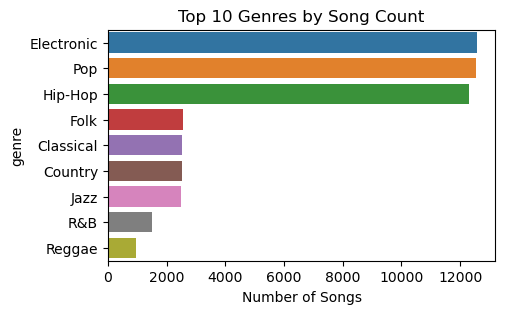

In [39]:
# 5. Top genres
plt.figure(figsize=(5, 3))
top_genres = df['genre'].value_counts().nlargest(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='tab10')
plt.title('Top 10 Genres by Song Count')
plt.xlabel('Number of Songs')

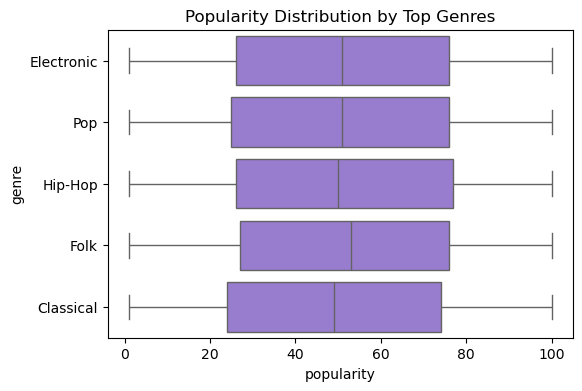

In [41]:
# 6. Popularity by genre
plt.figure(figsize=(6, 4))
if 'popularity' in df.columns:
    top_5_genres = df['genre'].value_counts().nlargest(5).index
    genre_pop = df[df['genre'].isin(top_5_genres)]
    sns.boxplot(x='popularity', y='genre', data=genre_pop, order=top_5_genres, color='mediumpurple')
    plt.title('Popularity Distribution by Top Genres')

Text(0, 0.5, 'Total Streams')

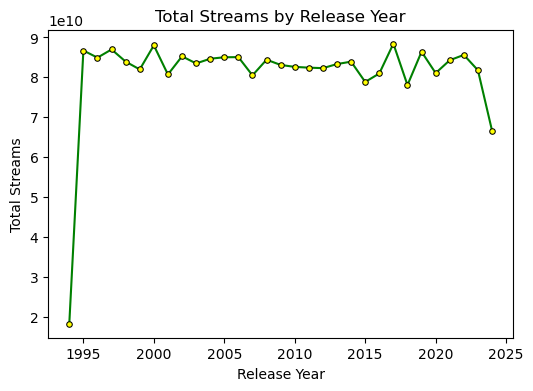

In [43]:
# 7. Streams over time (by release year)
plt.figure(figsize=(6, 4))
df['release_year'] = df['release_date'].dt.year
yearly_streams = df.groupby('release_year')['stream'].sum()
sns.lineplot(x=yearly_streams.index, y=yearly_streams.values, color='green',marker='o',
            markersize=4,markeredgecolor='black',markerfacecolor='yellow')
plt.title('Total Streams by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Streams')

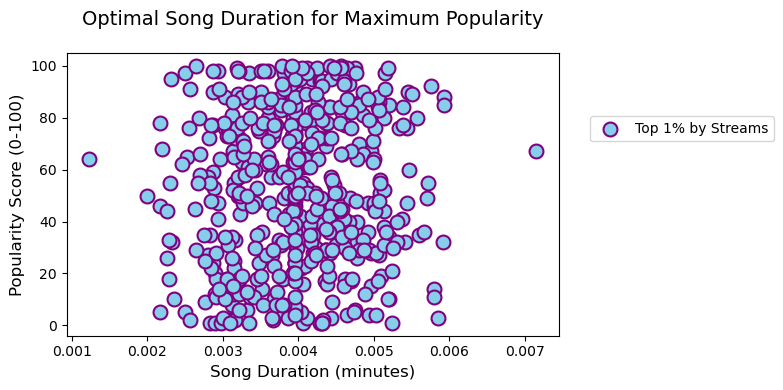

In [46]:
# 8. Highlight the most successful songs (top 1% by streams)
top_streams = df.nlargest(int(len(df)*0.01), 'stream')
plt.figure(figsize=(8,4))
plt.scatter(
    x=top_streams['duration_min'],
    y=top_streams['popularity'],
    s=100,  
    edgecolors='purple',
    facecolors='skyblue',
    linewidths=1.5,
    label='Top 1% by Streams'
)
plt.title("Optimal Song Duration for Maximum Popularity", fontsize=14, pad=20)
plt.xlabel("Song Duration (minutes)", fontsize=12)
plt.ylabel("Popularity Score (0-100)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.tight_layout()
plt.show()

#### Univariate Analysis

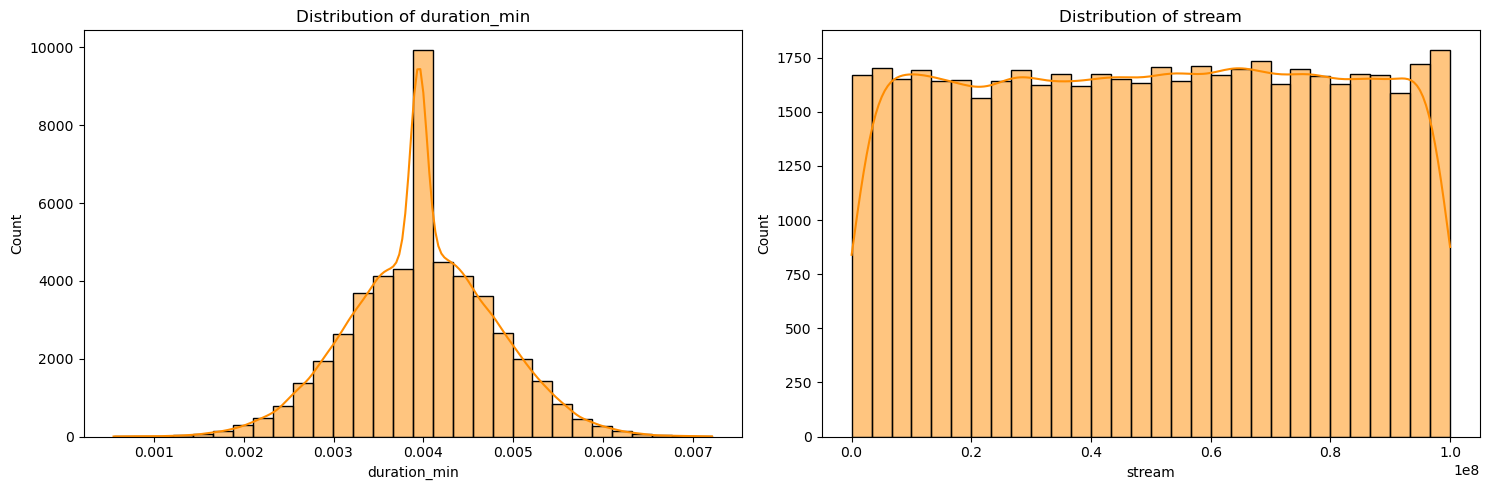

In [50]:
# Numerical features distribution
num_features = ['duration_min', 'stream']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='darkorange')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

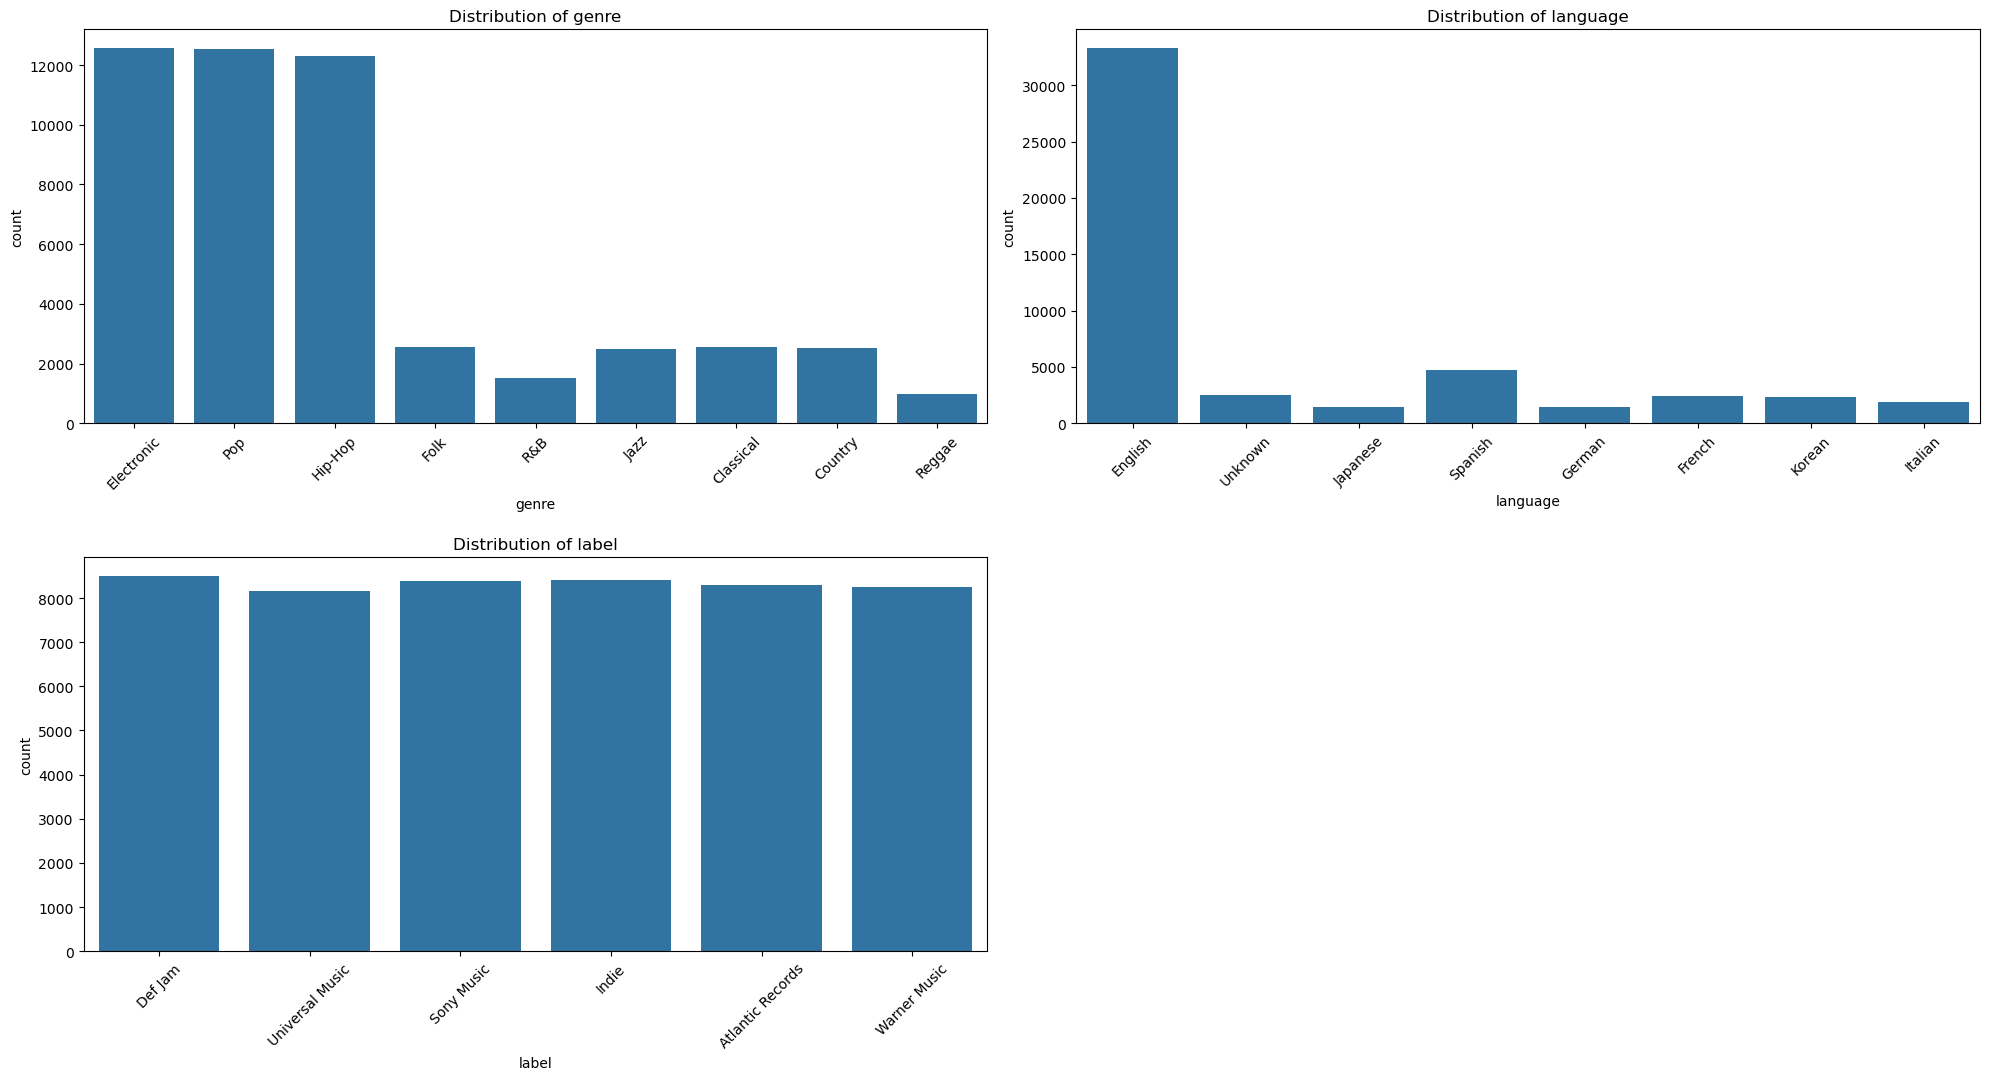

In [52]:
# Categorical features distribution
cat_features = ['genre', 'language', 'label',]
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    if df[col].nunique() > 10:  # For genres with many categories
        top_10 = df[col].value_counts().nlargest(10).index
        sns.countplot(y=col, data=df[df[col].isin(top_10)], order=top_10)
    else:
        sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Bivariate Analysis

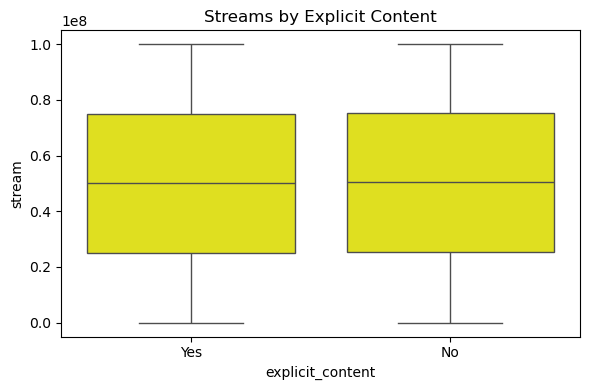

In [55]:
# Popularity by Explicit content
plt.figure(figsize=(6, 4))
sns.boxplot(x='explicit_content', y='stream', data=df, color='yellow')
plt.title('Streams by Explicit Content')
plt.tight_layout()
plt.show()


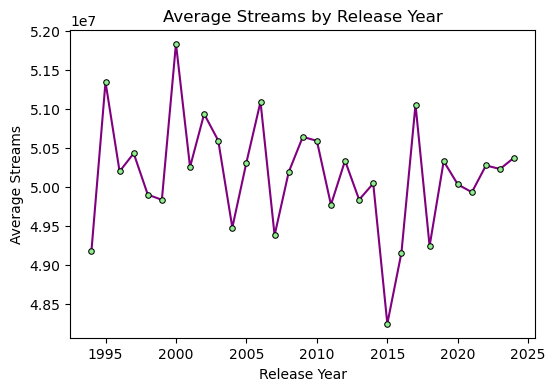

In [56]:
# Time-based analysis
if 'release_date' in df.columns:
    plt.figure(figsize=(6, 4))
    df['release_year'] = df['release_date'].dt.year
    yearly_streams = df.groupby('release_year')['stream'].mean()
    sns.lineplot(x=yearly_streams.index, y=yearly_streams.values, color='purple',
                marker='o', markersize=4, markeredgecolor="black", markerfacecolor="lightgreen")
    plt.title('Average Streams by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Average Streams')
    plt.show()

#### Multivariate Analysis

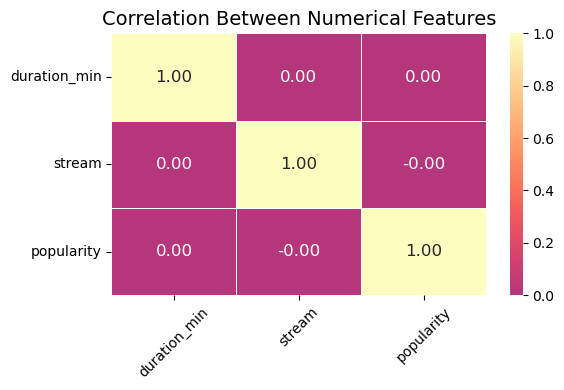

In [61]:
# Correlation heatmap

num_cols = ['duration_min', 'stream', 'popularity']
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='magma', 
    center=0, 
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 12}
)
plt.title('Correlation Between Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

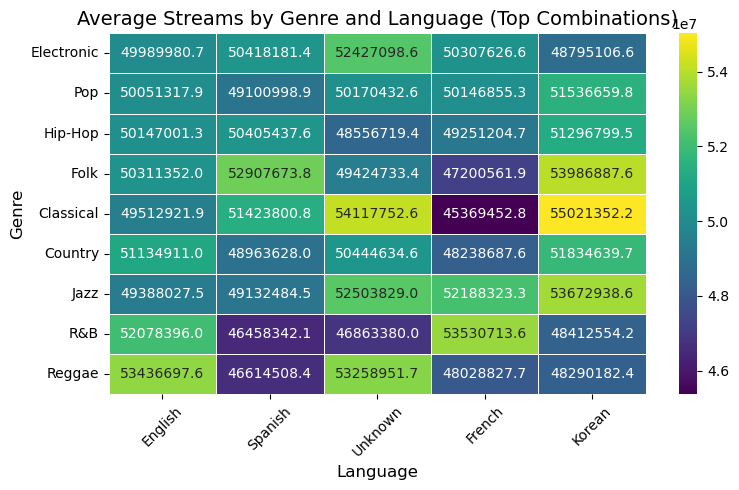

In [63]:
# Genre-Language Popularity Heatmap
heatmap_data = df.pivot_table(
    index='genre', 
    columns='language', 
    values='stream', 
    aggfunc='mean',
    fill_value=0
)

# Filter for top genres/languages (avoid overcrowding)
top_genres = df['genre'].value_counts().nlargest(10).index
top_languages = df['language'].value_counts().nlargest(5).index
heatmap_data = heatmap_data.loc[top_genres, top_languages]

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data, 
    cmap='viridis', 
    annot=True, 
    fmt=".1f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.title('Average Streams by Genre and Language (Top Combinations)', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

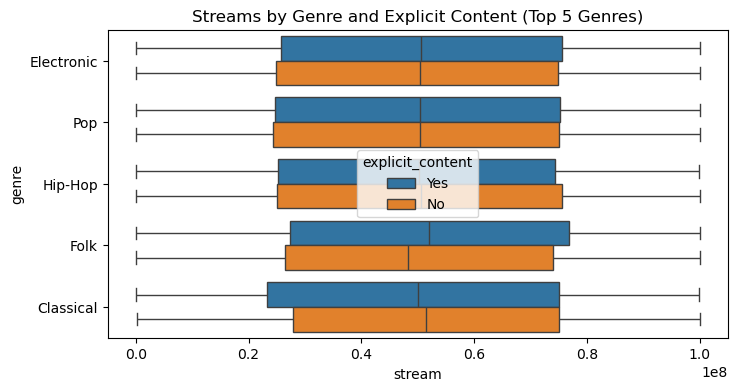

In [65]:
# Popularity by Genre and Explicit content
if 'genre' in df.columns and 'explicit_content' in df.columns:
    plt.figure(figsize=(8, 4))
    top_genres = df['genre'].value_counts().nlargest(5).index
    sns.boxplot(y='genre', x='stream', hue='explicit_content', 
               data=df[df['genre'].isin(top_genres)], order=top_genres)
    plt.title('Streams by Genre and Explicit Content (Top 5 Genres)')
    plt.show()

#### Advanced Analysis

C:\Users\afree\AppData\Local\Temp\ipykernel_20028\1878496622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='Set1')


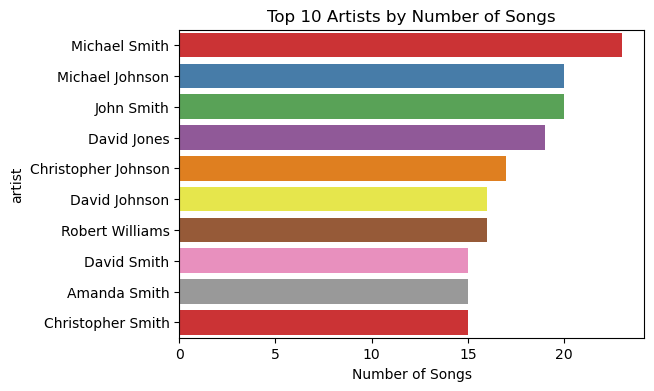

C:\Users\afree\AppData\Local\Temp\ipykernel_20028\1878496622.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_streams.values, y=artist_streams.index, palette='tab10')


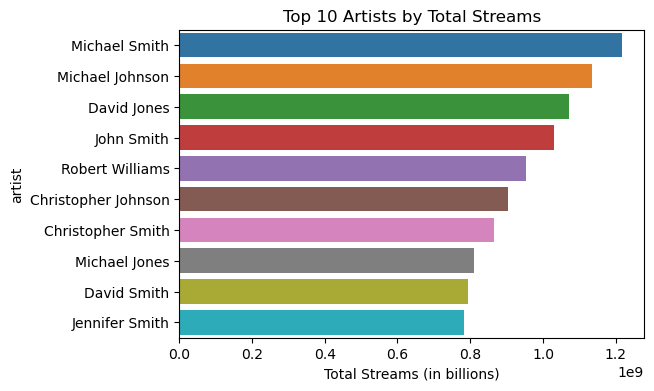

In [68]:
# Artist analysis

if 'artist' in df.columns:
    # Top 10 artists by number of songs
    top_artists = df['artist'].value_counts().nlargest(10)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_artists.values, y=top_artists.index, palette='Set1')
    plt.title('Top 10 Artists by Number of Songs')
    plt.xlabel('Number of Songs')
    plt.show()
    
    # Top 10 artists by total streams
    artist_streams = df.groupby('artist')['stream'].sum().nlargest(10)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=artist_streams.values, y=artist_streams.index, palette='tab10')
    plt.title('Top 10 Artists by Total Streams')
    plt.xlabel('Total Streams (in billions)')
    plt.show()